In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

In [3]:
conn = sqlite3.connect('data/badania_inz1.db')
query = "SELECT * FROM t_czerwiec"
df_czerwiec = pd.read_sql_query(query,conn)
query = "SELECT * FROM t_lipiec"
df_lipiec = pd.read_sql_query(query,conn)
query = "SELECT * FROM t_dodatkowa"
df_dodatkowa = pd.read_sql_query(query,conn)

In [4]:
mean_chlorofil_per_wilgotnosc_czerwiec = df_czerwiec.groupby('Wilgotnosc_gleby')['Wskaznik_zawartosci_chlorofilu'].mean()
print(mean_chlorofil_per_wilgotnosc_czerwiec)

Wilgotnosc_gleby
1    8.535484
3    8.783333
4    8.510000
5    9.136364
6    9.242105
8    8.584615
Name: Wskaznik_zawartosci_chlorofilu, dtype: float64


In [5]:
mean_chlorofil_per_wilgotnosc_lipiec = df_lipiec.groupby('Wilgotnosc_gleby')['Wskaznik_zawartosci_chlorofilu'].mean()
print(mean_chlorofil_per_wilgotnosc_lipiec)

Wilgotnosc_gleby
1     10.853171
2     10.966667
4     13.400000
5     13.100000
10    11.387097
Name: Wskaznik_zawartosci_chlorofilu, dtype: float64


In [6]:
mean_chlorofil_per_wilgotnosc_dodatkowa = df_dodatkowa.groupby('Wilgotnosc_gleby')['Wskaznik_zawartosci_chlorofilu'].mean()
print(mean_chlorofil_per_wilgotnosc_dodatkowa)

Wilgotnosc_gleby
1    10.710331
Name: Wskaznik_zawartosci_chlorofilu, dtype: float64


C:\Users\CeX\AppData\Local\Temp\ipykernel_9924\2064621263.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


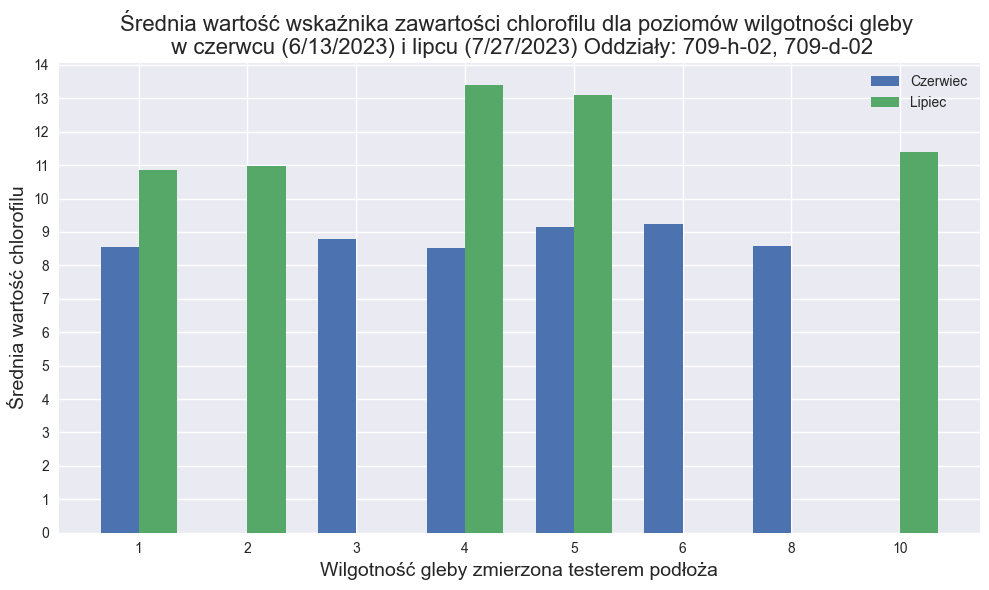

In [26]:
plt.figure(figsize=(10,6))
plt.style.use('seaborn')

unique_indexes = sorted(set(mean_chlorofil_per_wilgotnosc_czerwiec.index) | set(mean_chlorofil_per_wilgotnosc_lipiec.index))
bar_width = 0.35
index = np.arange(len(unique_indexes))


chlorofil_czerwiec = [mean_chlorofil_per_wilgotnosc_czerwiec.get(idx, 0) for idx in unique_indexes]
chlorofil_lipiec = [mean_chlorofil_per_wilgotnosc_lipiec.get(idx, 0) for idx in unique_indexes]

plt.bar(index, chlorofil_czerwiec, bar_width, label='Czerwiec')
plt.bar(index + bar_width, chlorofil_lipiec, bar_width, label='Lipiec')

plt.xlabel('Wilgotność gleby zmierzona testerem podłoża',fontsize=14)
plt.ylabel('Średnia wartość chlorofilu',fontsize=14)
plt.title('Średnia wartość wskaźnika zawartości chlorofilu dla poziomów wilgotności gleby \n w czerwcu (6/13/2023) i lipcu (7/27/2023) Oddziały: 709-h-02, 709-d-02', fontsize=16)
plt.xticks(index + bar_width / 2, unique_indexes)
plt.legend()
plt.yticks([i for i in range(0, 15, 1)])
plt.tight_layout()
plt.show()

C:\Users\CeX\AppData\Local\Temp\ipykernel_9924\2811059834.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


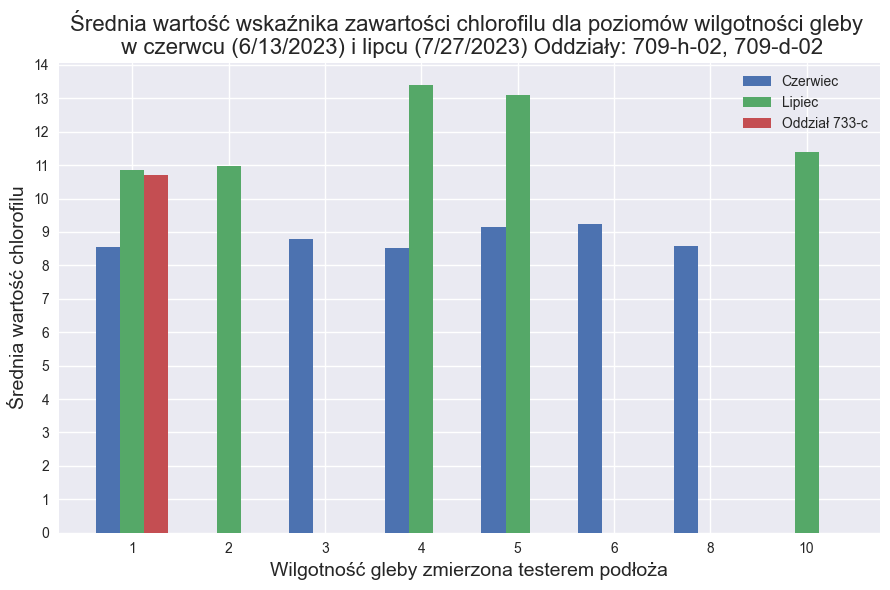

In [28]:
unique_indexes = sorted(set(mean_chlorofil_per_wilgotnosc_czerwiec.index) | 
                        set(mean_chlorofil_per_wilgotnosc_lipiec.index) | 
                        set(mean_chlorofil_per_wilgotnosc_dodatkowa.keys()))

bar_width = 0.25
index = np.arange(len(unique_indexes))
plt.style.use('seaborn')
chlorofil_czerwiec = [mean_chlorofil_per_wilgotnosc_czerwiec.get(idx, 0) for idx in unique_indexes]
chlorofil_lipiec = [mean_chlorofil_per_wilgotnosc_lipiec.get(idx, 0) for idx in unique_indexes]
chlorofil_dodatkowa = [mean_chlorofil_per_wilgotnosc_dodatkowa.get(idx, 0) for idx in unique_indexes]

plt.figure(figsize=(9, 6))

plt.bar(index, chlorofil_czerwiec, bar_width, label='Czerwiec')
plt.bar(index + bar_width, chlorofil_lipiec, bar_width, label='Lipiec')
plt.bar(index + 2 * bar_width, chlorofil_dodatkowa, bar_width, label='Oddział 733-c')

plt.xlabel('Wilgotność gleby zmierzona testerem podłoża', fontsize=14)
plt.ylabel('Średnia wartość chlorofilu', fontsize=14)
plt.title('Średnia wartość wskaźnika zawartości chlorofilu dla poziomów wilgotności gleby \n w czerwcu (6/13/2023) i lipcu (7/27/2023) Oddziały: 709-h-02, 709-d-02', fontsize=16)
plt.xticks(index + bar_width, unique_indexes)
plt.legend()
plt.yticks([i for i in range(0, 15, 1)])
plt.tight_layout()
plt.show()

C:\Users\CeX\AppData\Local\Temp\ipykernel_9924\2361047067.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


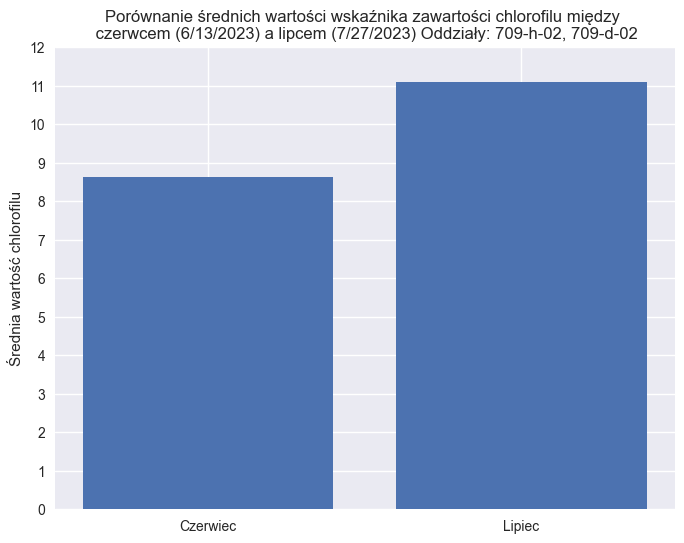

In [20]:
plt.figure(figsize=(8, 6))
plt.style.use('seaborn')
# Średnia wartość dla lipca
mean_czerwiec = df_czerwiec['Wskaznik_zawartosci_chlorofilu'].mean()
# Średnia wartość dla dodatkowej
mean_lipiec = df_lipiec['Wskaznik_zawartosci_chlorofilu'].mean()

# Wykres słupkowy dla średnich wartości
plt.bar([0, 1], [mean_czerwiec, mean_lipiec], tick_label=['Czerwiec', 'Lipiec'])

# Etykiety osi i tytuł
plt.ylabel('Średnia wartość chlorofilu',fontsize=11)
plt.title('Porównanie średnich wartości wskaźnika zawartości chlorofilu między \n czerwcem (6/13/2023) a lipcem (7/27/2023) Oddziały: 709-h-02, 709-d-02',fontsize=14)
plt.yticks([i for i in range(0, 13, 1)])
plt.show()

C:\Users\CeX\AppData\Local\Temp\ipykernel_9924\2577472579.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


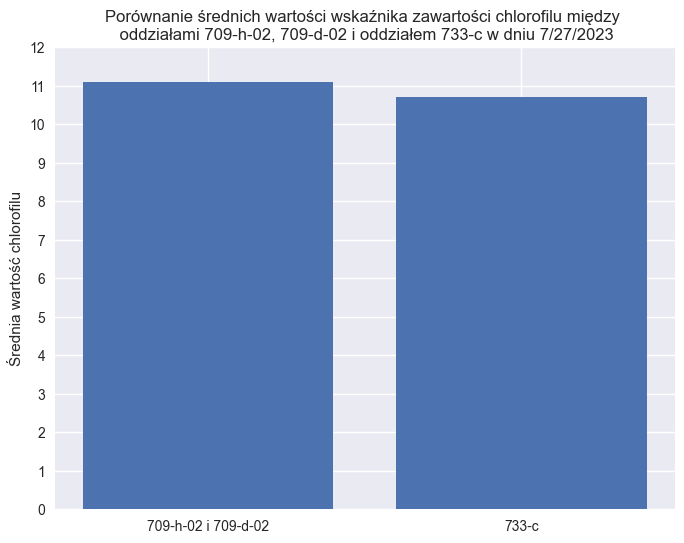

In [29]:
plt.figure(figsize=(8, 6))
plt.style.use('seaborn')
# Średnia wartość dla lipca
mean_lipiec = df_lipiec['Wskaznik_zawartosci_chlorofilu'].mean()
# Średnia wartość dla dodatkowej
mean_dodatkowa = df_dodatkowa['Wskaznik_zawartosci_chlorofilu'].mean()

# Wykres słupkowy dla średnich wartości
plt.bar([0, 1], [mean_lipiec, mean_dodatkowa], tick_label=['709-h-02 i 709-d-02', '733-c'])

# Etykiety osi i tytuł
plt.ylabel('Średnia wartość chlorofilu',fontsize=11)
plt.title('Porównanie średnich wartości wskaźnika zawartości chlorofilu między \n oddziałami 709-h-02, 709-d-02 i oddziałem 733-c w dniu 7/27/2023',fontsize=12)
plt.yticks([i for i in range(0, 13, 1)])
plt.show()